<span style="font-size:1em; text-align:center">CSE 6748 – Applied Analytics Practicum Summer 2022 </span>

<span style="font-size:2em; text-align:center">Commnet’s Cell Site Performance Anomaly Detection</span>
<p>Nirajan Ramarajar (nramarajar3)</p>

In [1]:
import sqlite3
import pandas as pd
import matplotlib.dates as md
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
from sklearn.cluster import KMeans
from sklearn.svm import OneClassSVM
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import time
from sklearn.decomposition import PCA
# from kats.consts import TimeSeriesData
# from kats.detectors.outlier import OutlierDetector
# from sklearn.ensemble import IsolationForest
# from sklearn.cluster import DBSCAN

# import sys
# # print(sys.version)

# # #!{sys.executable} -m pip install numpy
# # #!{sys.executable} -m pip install scikit-image
# # !{sys.executable} -m pip install kats
# # #pip install kats
# !{sys.executable} -m pip install bayesian-changepoint-detection
# !{sys.executable} -m pip install pillow

## Open SQLite Annomaly DB and read the data

In [2]:
data = "hour";

def readData(bts_id="10-1"):
    con = sqlite3.connect("data/anomaly_latest.db")
    query = "SELECT * from testdata_hour where BTS_ID='%s'" % bts_id;
    df = pd.read_sql_query(query, con)
    return df

def printData(df):
    print(df.shape)
    print(df.head())
    print (df.info())
    print ( df.describe())


### Check for null if any in the data. test data does not have null

In [3]:
def checkForNull(df):
    print ( df.isnull().any().any())


### Converting day to datetime object

In [4]:
def convertToDateTime(df):
    df1 = df.copy()
    df1['day'] =  pd.to_datetime(df1['day'])
    print("Day object type")
    print(df1[['day']].info())
    return df1


### Droping day and BTS_ID to scale.

In [5]:

def dropCol(df):
    columns_to_drop = ['day', 'BTS_ID']
    df_day = df[['day']]
    df = df.drop(columns_to_drop, axis=1)
    return df
# columns_to_drop = ['day', 'BTS_ID']
# df_day = df1[['day']]
# df1 = df1.drop(columns_to_drop, axis=1)
# print (df1.shape)

### Performaing scaling using RobustScaler to preserve outliers

In [6]:
def scale(df):
    scaler = RobustScaler()
    start_time = time.time()
    np_scaled = scaler.fit_transform(df)
    end_time = time.time()
    print("Scale Time --- %s seconds ---" % (end_time - start_time))
    df2 = pd.DataFrame(np_scaled)
    df2.columns = df.columns
    return df2
# scaler = RobustScaler()
# start_time = time.time()
# np_scaled = scaler.fit_transform(df1)
# end_time = time.time()
# print("Scale Time --- %s seconds ---" % (end_time - start_time))
# df2 = pd.DataFrame(np_scaled)
# df2.columns = df1.columns

In [7]:
df = readData("10-1")
printData (df)
checkForNull(df)
df1 = convertToDateTime(df)
df1 = dropCol(df1)
df2 = scale(df1)
plt.style.use("Solarize_Light2")

(329, 33)
                   day BTS_ID  RRC_Conn_Release_due_to_S1_Link_Fail  \
0  2022-06-09 00:00:00   10-1                                   0.0   
1  2022-06-09 01:00:00   10-1                                   0.0   
2  2022-06-09 02:00:00   10-1                                   0.0   
3  2022-06-09 03:00:00   10-1                                   0.0   
4  2022-06-09 04:00:00   10-1                                   0.0   

   Max_Num_RRC_Conn_User  Mean_RRC_Conn_Setup_Time_ms  \
0                   39.0                      59695.0   
1                   38.0                      57092.0   
2                   35.0                      57281.0   
3                   33.0                      56600.0   
4                   41.0                      59640.0   

   Avg_PRACH_Usage_per_Second  FDD_Cell_DL_Avg_Agg_Thruput_Mbps  \
0                    1.158333                              9.09   
1                    1.381388                              9.23   
2                  

### Correlation of 32 performance indicators.

In [8]:
df2.corr()

,RRC_Conn_Release_due_to_S1_Link_Fail,Max_Num_RRC_Conn_User,Mean_RRC_Conn_Setup_Time_ms,Avg_PRACH_Usage_per_Second,FDD_Cell_DL_Avg_Agg_Thruput_Mbps,FDD_Cell_UL_Avg_Agg_Thruput_Mbps,FDD_Cell_DL_MAC_Data_Volume_MB,FDD_Cell_UL_MAC_Data_Volume_MB,Avg_CQI,FDD_RRC_Est_Success_Pct,...,DL_64QAM_Modulation_Scheme_Usage_Pct,UL_16QAM_Modulation_Scheme_Usage_Pct,FDD_ERAB_Setup_Success_Pct,DL_64QAM_vs_UL_16_ratio,Avg_CQI_to DL_64QAM_ratio,DL_PRB_vs_UL_PRB_ratio,MIMO_Usage_Pct,RSSI_Avg_dBm,PRACH_Avg_NI_dBm,Power_DL_Avg_mw
RRC_Conn_Release_due_to_S1_Link_Fail,1.000000,0.281622,0.151228,0.038478,0.044902,0.108158,0.070588,0.107524,-0.051694,-0.059678,...,-0.007808,0.053618,-0.274925,-0.026852,-0.016982,0.016757,0.044935,0.045962,-0.023440,0.083567
Max_Num_RRC_Conn_User,0.281622,1.000000,0.807699,0.515264,0.395549,0.595892,0.738490,0.791305,-0.628784,0.073558,...,-0.195559,0.428407,-0.163925,-0.348097,-0.067385,0.459604,0.185585,0.721556,0.100400,0.803773
Mean_RRC_Conn_Setup_Time_ms,0.151228,0.807699,1.000000,0.536009,0.294832,0.398971,0.575200,0.587336,-0.413114,0.081999,...,-0.141504,0.269500,-0.131838,-0.241386,-0.008821,0.349701,0.179759,0.547745,0.037032,0.623666
Avg_PRACH_Usage_per_Second,0.038478,0.515264,0.536009,1.000000,0.130423,0.373722,0.382602,0.480400,-0.403901,-0.050766,...,-0.229603,0.207610,-0.087104,-0.278997,0.101996,0.261380,-0.028939,0.519539,0.244593,0.476259
FDD_Cell_DL_Avg_Agg_Thruput_Mbps,0.044902,0.395549,0.294832,0.130423,1.000000,0.219367,0.798418,0.367433,-0.238370,0.123148,...,0.469574,0.491867,-0.001953,0.187781,-0.508796,0.683110,0.688166,0.436300,0.210168,0.602471
FDD_Cell_UL_Avg_Agg_Thruput_Mbps,0.108158,0.595892,0.398971,0.373722,0.219367,1.000000,0.492955,0.903895,-0.530523,-0.120919,...,-0.113859,0.388497,-0.172837,-0.256658,-0.134537,0.058407,0.093806,0.618755,0.060376,0.557917
FDD_Cell_DL_MAC_Data_Volume_MB,0.070588,0.738490,0.575200,0.382602,0.798418,0.492955,1.000000,0.742728,-0.638641,0.107878,...,0.016262,0.591549,-0.073492,-0.234327,-0.223420,0.813253,0.433875,0.755169,0.222711,0.949734
FDD_Cell_UL_MAC_Data_Volume_MB,0.107524,0.791305,0.587336,0.480400,0.367433,0.903895,0.742728,1.000000,-0.700250,-0.023264,...,-0.210535,0.468695,-0.174597,-0.365521,-0.074182,0.346672,0.149398,0.800077,0.155191,0.820260
Avg_CQI,-0.051694,-0.628784,-0.413114,-0.403901,-0.238370,-0.530523,-0.638641,-0.700250,1.000000,0.052361,...,0.440024,-0.406449,0.254802,0.558627,-0.052123,-0.562877,0.084337,-0.710975,-0.136809,-0.765806
FDD_RRC_Est_Success_Pct,-0.059678,0.073558,0.081999,-0.050766,0.123148,-0.120919,0.107878,-0.023264,0.052361,1.000000,...,0.011736,0.164469,0.219922,-0.042173,0.029778,0.147586,0.213701,0.061733,0.230698,0.084842


In [9]:
componentList = []
number_of_components = 1
for i in range(0, number_of_components):
    j = i + 1
    componentList.append("comp"+str(j))
        
def doPCA(dataset):
    start_time = time.time()
    print(componentList)
    pca = PCA(n_components=number_of_components)
    pca.fit(dataset)
    pca_dataset = pca.transform(dataset)
    #saveModel(LE, "PcaModel.ml")
    print ( pca_dataset.shape)
    #print ( final_dataset.shape)
    print ( dataset.shape)
    end_time = time.time()
    print("--- %s seconds ---" % (end_time - start_time))
    return pca_dataset;

def doOneClassSVM(dataset):
    outliers_fraction = 0.2
    start_time = time.time()
    #clf = OneClassSVM(gamma='auto').fit(dataset)
    clf = OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.01).fit(dataset)
    end_time = time.time()
    print("Fit Time --- %s seconds ---" % (end_time - start_time))
    df1_y = clf.predict(dataset)
    end_predict_time = time.time()
    print("Predict Time --- %s seconds ---" % (end_predict_time - end_time))
    return df1_y

def evaluateClustersKMeans(dataset):
    n_cluster = range(1, 10)
    kmeans = [KMeans(n_clusters=i).fit(dataset) for i in n_cluster]
    scores = [kmeans[i].score(dataset) for i in range(len(kmeans))]
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(n_cluster, scores)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.title('Elbow Curve')
    #plt.show();
    plt.savefig("./images/KMeans_Cluster_"+data+".png")
    

### Perform PCA to reduce correlation and dimensions

In [10]:
pca_dataset = doPCA(df2)


['comp1']
(329, 1)
(329, 31)
--- 0.5269951820373535 seconds ---


### Performing One Class SVM & plotting anomaly

In [11]:
reduced_data_set = pca_dataset
y_predict = doOneClassSVM(reduced_data_set)
df_pca = pd.DataFrame(reduced_data_set, columns = componentList)
df_pca['time'] =  pd.to_datetime(df['day'])
df_pca = df_pca[['time','comp1']]
df_pca.head()

Fit Time --- 0.0033597946166992188 seconds ---
Predict Time --- 0.003626108169555664 seconds ---


,time,comp1
0,2022-06-09 00:00:00,2.234769
1,2022-06-09 01:00:00,-0.202633
2,2022-06-09 02:00:00,-1.721512
3,2022-06-09 03:00:00,-2.721862
4,2022-06-09 04:00:00,-1.624570


(array([-1,  1]), array([ 67, 262]))


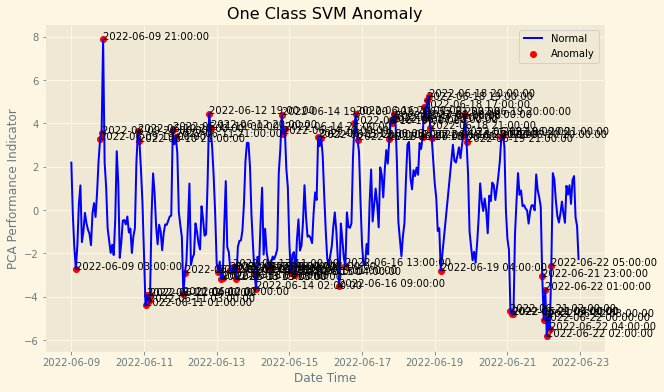

In [12]:
df_plot = df.copy()

df_plot['day'] =  pd.to_datetime(df_plot['day'])
df_plot['anomaly3'] = pd.Series(y_predict)
reduced_data_set[:,0:1].shape
df_plot['comp1'] = reduced_data_set[:,0:1];
# df_plot['comp1'] = pd.Series(reduced_data_set[:,0:1])
#df_plot.head()

print ( np.unique(y_predict, return_counts=True))

fig, ax = plt.subplots(figsize=(10,6))
a = df_plot.loc[df_plot['anomaly3'] == -1, ['day', 'comp1']] #anomaly

ax.plot(df_plot['day'], df_plot['comp1'], color='blue', label ='Normal')
ax.scatter(a['day'],a['comp1'], color='red', label = 'Anomaly')
for index, row in a.iterrows():
    day = row['day']
    comp1 = row['comp1']
    plt.text(day, comp1 , day)
plt.legend()
plt.xlabel('Date Time')
plt.ylabel('PCA Performance Indicator')
plt.title('One Class SVM Anomaly')
plt.savefig("./images/oneClassSVMAnomaly_"+data+".png")
plt.show();

### K-Means Number of Cluster evaluation (1-10)

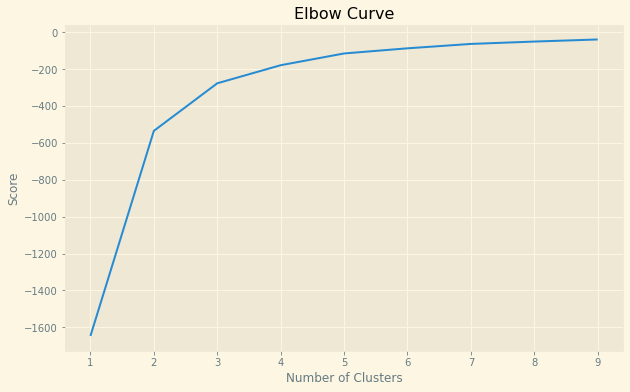

In [13]:
evaluateClustersKMeans(reduced_data_set)

### K-Means with 3 clusters for anomaly detection

In [14]:
km = KMeans(n_clusters=3)
km.fit(reduced_data_set)
y_predict_km=km.predict(reduced_data_set)
df_plot['anomaly4'] = pd.Series(y_predict_km)
print ( np.unique(y_predict_km, return_counts=True))
# df_plot.head()

(array([0, 1, 2], dtype=int32), array([101,  88, 140]))


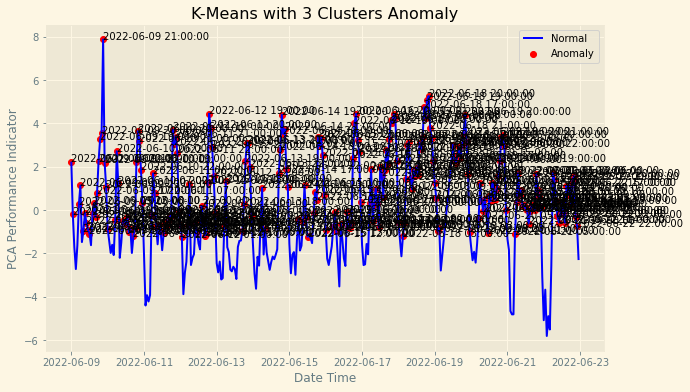

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
a = df_plot.loc[(df_plot['anomaly4'] > 0), ['day', 'comp1']] #anomaly

ax.plot(df_plot['day'], df_plot['comp1'], color='blue', label ='Normal')
ax.scatter(a['day'],a['comp1'], color='red', label = 'Anomaly')
plt.legend()
for index, row in a.iterrows():
    day = row['day']
    comp1 = row['comp1']
    plt.text(day, comp1 , day)
plt.xlabel('Date Time')
plt.ylabel('PCA Performance Indicator')
plt.title('K-Means with 3 Clusters Anomaly')
plt.savefig("./images/kmeansAnomaly_"+data+".png")
plt.show();

### TimeSeries Decomposition to find Trends, Seasonality and Residual

/Users/nramarajar/opt/anaconda3/envs/Project/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


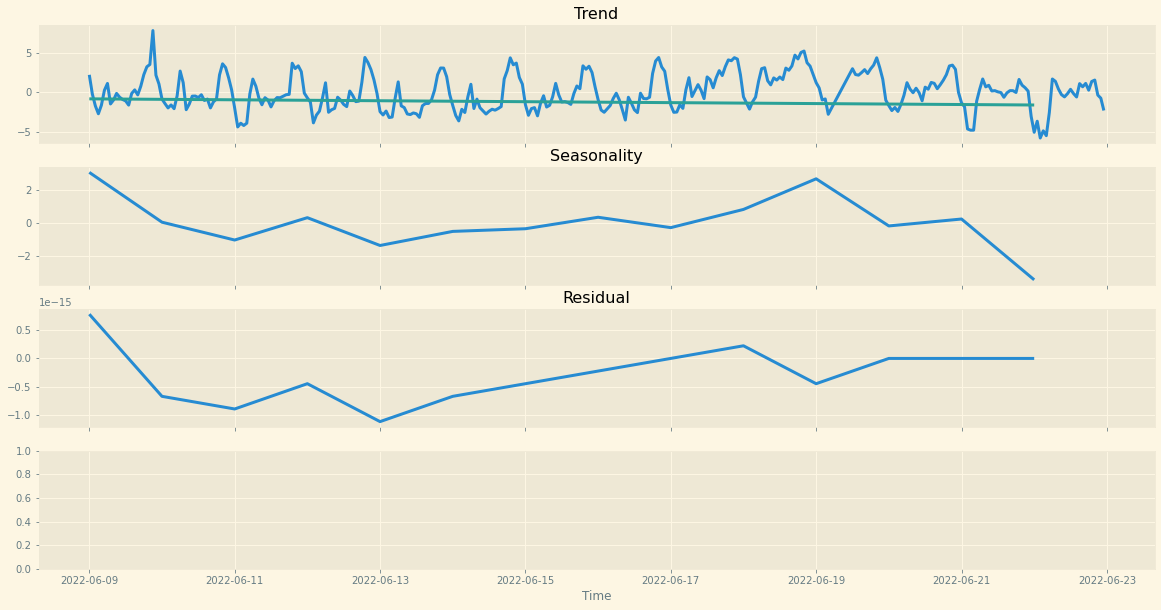

In [16]:
from kats.utils.decomposition import TimeSeriesDecomposition
from kats.consts import TimeSeriesData

df_pca1 = df_pca.copy()
df_pca1['value'] = df_pca1['comp1']
columns_to_drop = componentList
df_pca1 = df_pca1.drop(columns_to_drop, axis=1)

timeseries = TimeSeriesData(df_pca1)

decomposer = TimeSeriesDecomposition(timeseries, decomposition="additive")
results = decomposer.decomposer()
fig = decomposer.plot()
plt.savefig("./images/timeSeriesDecomposition_"+data+".png")

### Using OutlierDetection for finding anomaly

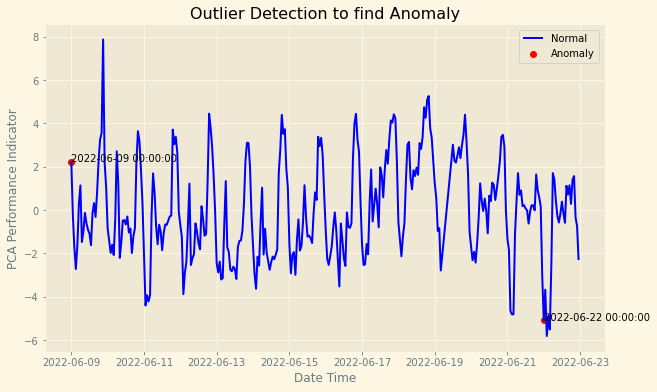

In [17]:
from kats.detectors.outlier import OutlierDetector
tsd = TimeSeriesData(df_pca1)
ts_outlierDetection = OutlierDetector(tsd)
ts_outlierDetection.detector()

df_plot['anomaly5'] = np.where(df_plot['day'].isin(ts_outlierDetection.outliers[0]), 0, 1)

fig, ax = plt.subplots(figsize=(10,6))
#df['hasimage'] = np.where(df['photos']!= '[]', True, False)
# a = df_plot.loc[(df_plot['anomaly4'] > 0) |  (df_plot['anomaly4'] > 1), ['day', 'comp1']] #anomaly
a = df_plot[df_plot['day'].isin(ts_outlierDetection.outliers[0])]
ax.plot(df_plot['day'], df_plot['comp1'], color='blue', label ='Normal')
ax.scatter(a['day'],a['comp1'], color='red', label = 'Anomaly')
plt.legend()
for index, row in a.iterrows():
    day = row['day']
    comp1 = row['comp1']
    plt.text(day, comp1 , day)
plt.xlabel('Date Time')
plt.ylabel('PCA Performance Indicator')
plt.title('Outlier Detection to find Anomaly')
plt.savefig("./images/outlierDetection_"+data+".png")
plt.show();

### Using IsolationForest for finding anomaly

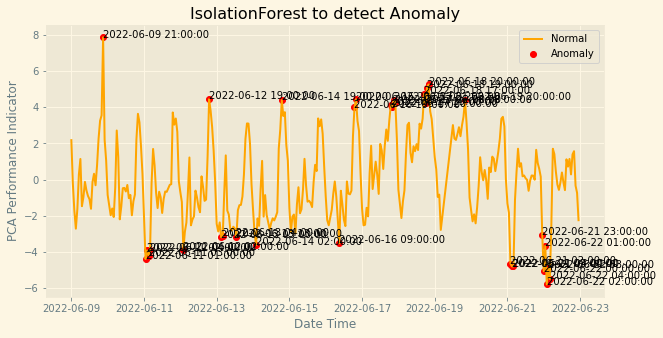

In [18]:
from sklearn.ensemble import IsolationForest
def doIsolationForest(dataset):
    # Isolation forest 
    outliers_fraction = 0.1
    ifo = IsolationForest(contamination = outliers_fraction)
    ifo.fit(reduced_data_set)
    df_plot['anomaly_if'] = pd.Series(ifo.predict(dataset))
    fig, ax = plt.subplots(figsize = (10, 5))
    a = df_plot.loc[df_plot['anomaly_if'] == -1, ['day', 'comp1']]
    ax.plot(df_plot['day'], df_plot['comp1'], 
            color = 'orange', label = 'Normal')
    ax.scatter(a['day'], a['comp1'], 
               color = 'red', label = 'Anomaly')
    plt.legend()
    for index, row in a.iterrows():
        day = row['day']
        comp1 = row['comp1']
        plt.text(day, comp1 , day)
    plt.xlabel('Date Time')
    plt.ylabel('PCA Performance Indicator')
    plt.title('IsolationForest to detect Anomaly')
    plt.savefig("./images/IsolationForest_"+data+".png")
    plt.show();
    
doIsolationForest(reduced_data_set)

### Using DBSCAN for anomaly detection

(array([-1,  0]), array([  1, 328]))


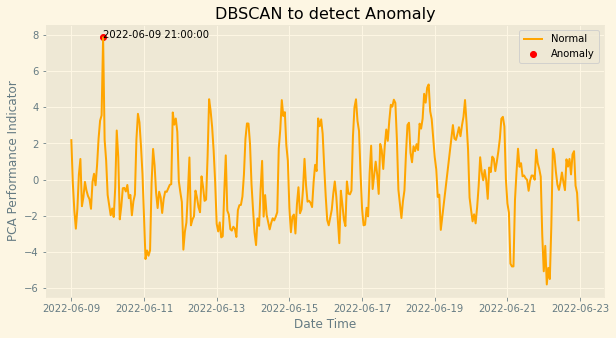

In [19]:
from sklearn.cluster import DBSCAN
def doDBSCAN(dataset):
    dbscan = DBSCAN(eps=0.6, min_samples=2)
    dbscan_result = dbscan.fit_predict(dataset)
    return dbscan_result

dbscan_result = doDBSCAN(reduced_data_set);
df_plot['anomaly_dbscan'] = pd.Series(dbscan_result)
print ( np.unique(dbscan_result, return_counts=True))
fig, ax = plt.subplots(figsize = (10, 5))
a = df_plot.loc[df_plot['anomaly_dbscan'] == -1, ['day', 'comp1']]
ax.plot(df_plot['day'], df_plot['comp1'], 
        color = 'orange', label = 'Normal')
ax.scatter(a['day'], a['comp1'], 
           color = 'red', label = 'Anomaly')

plt.xlabel('Date Time')
plt.ylabel('PCA Performance Indicator')
plt.title('DBSCAN to detect Anomaly')
for index, row in a.iterrows():
    day = row['day']
    comp1 = row['comp1']
    plt.text(day, comp1 , day)
plt.savefig("./images/dbscan_"+data+".png")
plt.legend()
plt.show();

In [20]:
df_plot['anomaly_all'] = 0
df_plot['anomaly_all'] = np.where(df_plot['anomaly3'] == -1, df_plot['anomaly_all']+1, df_plot['anomaly_all'])
df_plot['anomaly_all'] = np.where(df_plot['anomaly4'] > 0, df_plot['anomaly_all']+1, df_plot['anomaly_all'])
df_plot['anomaly_all'] = np.where(df_plot['anomaly5'] == 0, df_plot['anomaly_all']+1, df_plot['anomaly_all'])
df_plot['anomaly_all'] = np.where(df_plot['anomaly_if'] == -1, df_plot['anomaly_all']+1, df_plot['anomaly_all'])
df_plot['anomaly_all'] = np.where(df_plot['anomaly_dbscan'] == -1, df_plot['anomaly_all']+1, df_plot['anomaly_all'])
df_plot.head()

,day,BTS_ID,RRC_Conn_Release_due_to_S1_Link_Fail,Max_Num_RRC_Conn_User,Mean_RRC_Conn_Setup_Time_ms,Avg_PRACH_Usage_per_Second,FDD_Cell_DL_Avg_Agg_Thruput_Mbps,FDD_Cell_UL_Avg_Agg_Thruput_Mbps,FDD_Cell_DL_MAC_Data_Volume_MB,FDD_Cell_UL_MAC_Data_Volume_MB,...,RSSI_Avg_dBm,PRACH_Avg_NI_dBm,Power_DL_Avg_mw,anomaly3,comp1,anomaly4,anomaly5,anomaly_if,anomaly_dbscan,anomaly_all
0,2022-06-09 00:00:00,10-1,0.0,39.0,59695.0,1.158333,9.09,1.44,4004.732412,589.726262,...,-93.145216,-120.0,38516.75,1,2.234769,1,0,1,0,2
1,2022-06-09 01:00:00,10-1,0.0,38.0,57092.0,1.381388,9.23,1.40,1937.956037,301.999425,...,-96.191918,-120.0,20322.25,1,-0.202633,2,1,1,0,1
2,2022-06-09 02:00:00,10-1,0.0,35.0,57281.0,1.045555,12.76,1.67,2334.738450,280.130237,...,-96.410820,-120.0,17232.75,1,-1.721512,0,1,1,0,0
3,2022-06-09 03:00:00,10-1,0.0,33.0,56600.0,0.681944,14.03,1.72,3187.051075,361.352262,...,-92.822008,-120.0,19224.25,-1,-2.721862,0,1,1,0,1
4,2022-06-09 04:00:00,10-1,0.0,41.0,59640.0,0.701944,10.66,1.49,2024.671987,295.141787,...,-93.814347,-120.0,16560.00,1,-1.624570,0,1,1,0,0


In [21]:
df_plot['anomaly_all'].unique()

array([2, 1, 0, 4, 3])

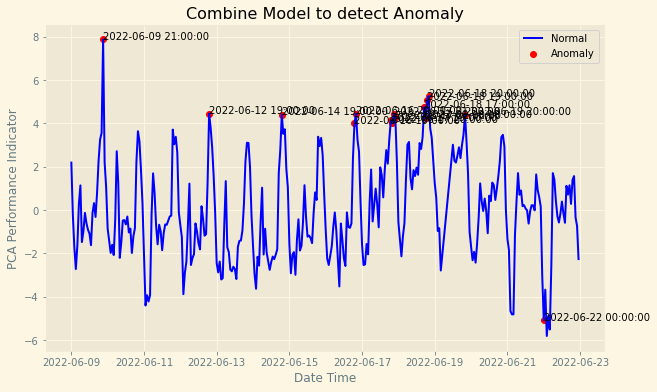

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
a = df_plot.loc[df_plot['anomaly_all'] > 2, ['day', 'comp1']] #anomaly
ax.plot(df_plot['day'], df_plot['comp1'], color='blue', label ='Normal')
ax.scatter(a['day'],a['comp1'], color='red', label = 'Anomaly')
plt.legend()
plt.xlabel('Date Time')
plt.ylabel('PCA Performance Indicator')
plt.title('Combine Model to detect Anomaly')
for index, row in a.iterrows():
    day = row['day']
    comp1 = row['comp1']
    plt.text(day, comp1 , day)


plt.savefig("./images/MaxAnomalyInAllModel_"+data+".png")
plt.show();